# MRMR with Feature-engine

In this notebook, we automate 

In [1]:
from itertools import compress

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from feature_engine.selection import MRMR

In [2]:
# load dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
y = y.map({0:1, 1:0})

print(X.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [4]:
sel = MRMR(method="FCQ", max_features=10, regression=False)

sel.fit(X, y)

MRMR(max_features=10, method='FCQ')

In [5]:
sel.relevance_

array([6.46981021e+02, 1.18096059e+02, 6.97235272e+02, 5.73060747e+02,
       8.36511234e+01, 3.13233079e+02, 5.33793126e+02, 8.61676020e+02,
       6.95274435e+01, 9.34592949e-02, 2.68840327e+02, 3.90947023e-02,
       2.53897392e+02, 2.43651586e+02, 2.55796780e+00, 5.32473391e+01,
       3.90144816e+01, 1.13262760e+02, 2.41174067e-02, 3.46827476e+00,
       8.60781707e+02, 1.49596905e+02, 8.97944219e+02, 6.61600206e+02,
       1.22472880e+02, 3.04341063e+02, 4.36691939e+02, 9.64385393e+02,
       1.18860232e+02, 6.64439606e+01])

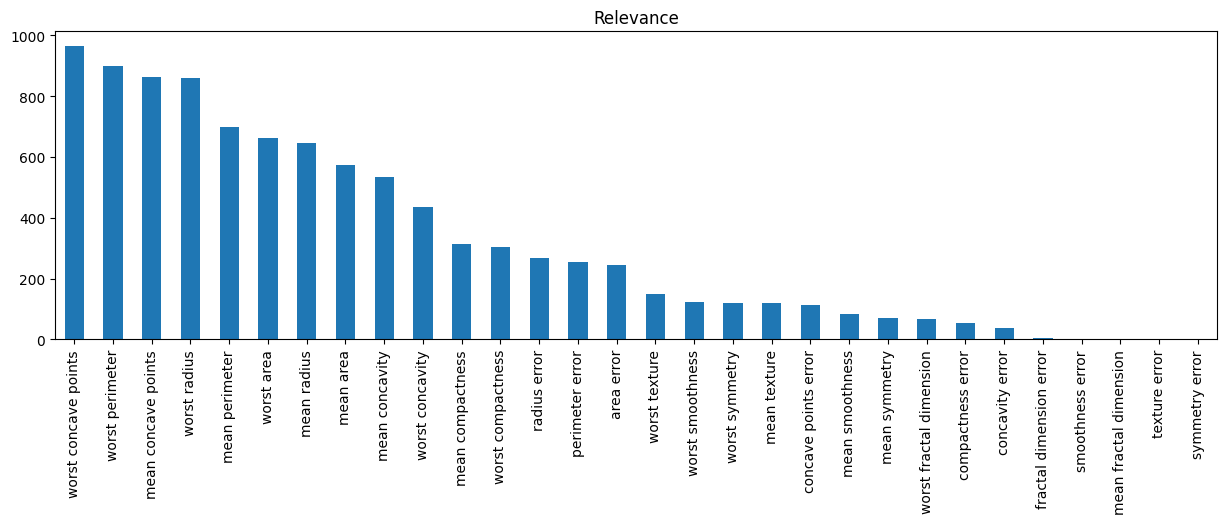

In [6]:
pd.Series(sel.relevance_, index=sel.variables_).sort_values(
    ascending=False).plot.bar(figsize=(15, 4))
plt.title("Relevance")
plt.show()

In [7]:
list(compress(sel.variables_, sel.get_support()))

['mean radius',
 'mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concavity',
 'worst concave points']

In [7]:
sel.redundance_

array([6196.15821542,  133.05876824, 6227.29215401, 2355.2733152 ,
        135.03538401,  442.82301531,  575.26152148,  666.93637339,
        108.18283331,  123.71509918,  731.00127784,   25.00542472,
        691.57943195,  565.40539072,   35.21629573,  228.46363233,
        175.7670852 ,  190.49932237,   37.35475678,  134.98503485,
       3194.31985518,  135.53962024, 2999.97186014, 1746.11614782,
        121.24488967,  359.44991008,  418.47932409,  533.70655754,
         93.65630926,  178.89484368])

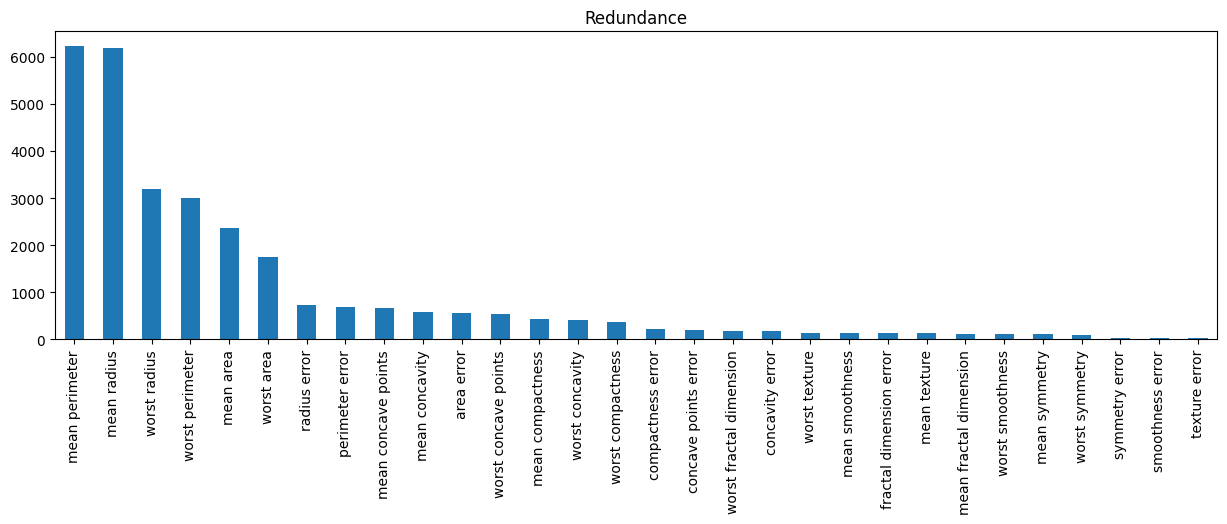

In [8]:
pd.Series(sel.redundance_, index=sel.variables_).sort_values(
    ascending=False).plot.bar(figsize=(15, 4))
plt.title("Redundance")
plt.show()

In [9]:
sel.mrmr_

mean radius                0.104416
mean texture               0.887548
mean perimeter             0.111964
mean area                  0.243310
mean smoothness            0.619476
mean compactness           0.707355
mean concavity             0.927914
mean concave points        1.291991
mean symmetry              0.642685
mean fractal dimension     0.000755
radius error               0.367770
texture error              0.001563
perimeter error            0.367127
area error                 0.430933
smoothness error           0.072636
compactness error          0.233067
concavity error            0.221967
concave points error       0.594557
symmetry error             0.000646
fractal dimension error    0.025694
worst radius               0.269473
worst texture              1.103713
worst perimeter            0.299318
worst area                 0.378898
worst smoothness           1.010128
worst compactness          0.846686
worst concavity            1.043521
worst concave points       1

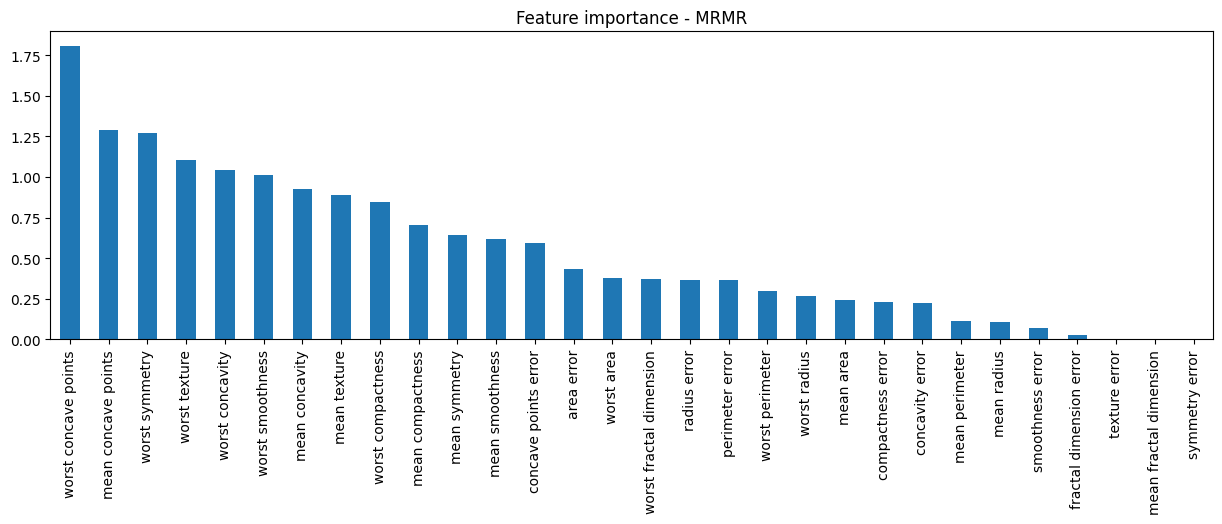

In [10]:
sel.mrmr_.sort_values(
    ascending=False).plot.bar(figsize=(15, 4))
plt.title("Feature importance - MRMR")
plt.show()

In [11]:
sel.features_to_drop_

['mean radius',
 'mean perimeter',
 'mean area',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst fractal dimension']

In [12]:
Xtr = sel.transform(X_test)

print(Xtr.head())

     mean texture  mean smoothness  mean compactness  mean concavity  \
512         20.52          0.11060           0.14690         0.14450   
457         25.25          0.08791           0.05205         0.02772   
439         15.66          0.07966           0.05581         0.02087   
298         18.17          0.06576           0.05220         0.02475   
37          18.42          0.08983           0.03766         0.02562   

     mean concave points  mean symmetry  concave points error  worst texture  \
512              0.08172         0.2116              0.013340          29.66   
457              0.02068         0.1619              0.006451          34.23   
439              0.02652         0.1589              0.010760          19.31   
298              0.01374         0.1635              0.005243          25.26   
37               0.02923         0.1467              0.011640          22.81   

     worst smoothness  worst compactness  worst concavity  \
512           0.15740    

## Random forest

In [13]:
sel = MRMR(
    method="RFCQ",
    scoring="roc_auc",
    param_grid = {"n_estimators": [5, 50, 500], "max_depth":[1,2,3]},
    cv=3,
    regression=False,
    random_state=42,
)

sel.fit(X, y)

MRMR(method='RFCQ',
     param_grid={'max_depth': [1, 2, 3], 'n_estimators': [5, 50, 500]},
     random_state=42)

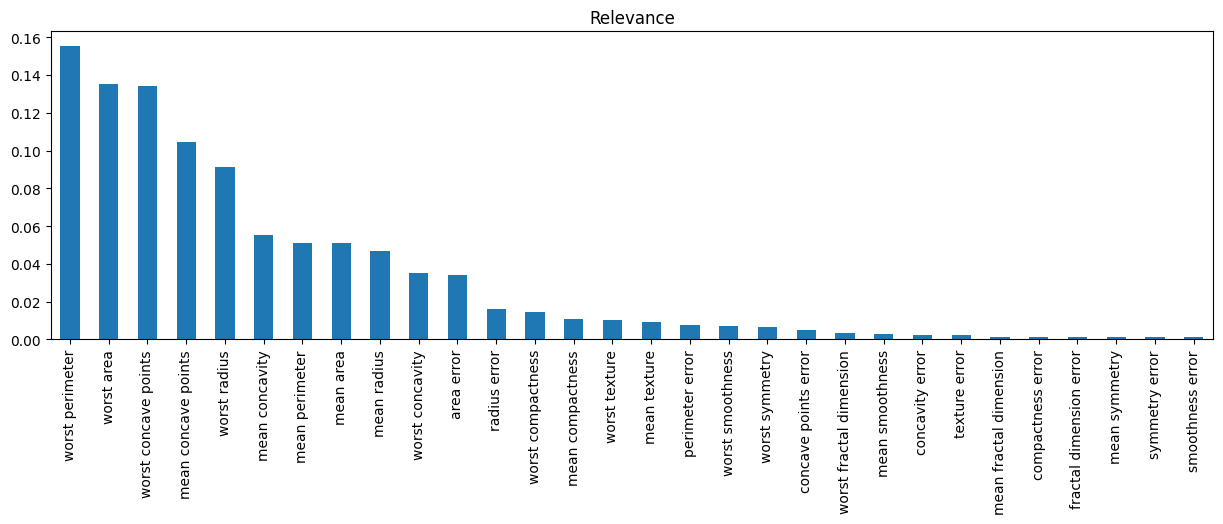

In [14]:
pd.Series(sel.relevance_, index=sel.variables_).sort_values(
    ascending=False).plot.bar(figsize=(15, 4))
plt.title("Relevance")
plt.show()

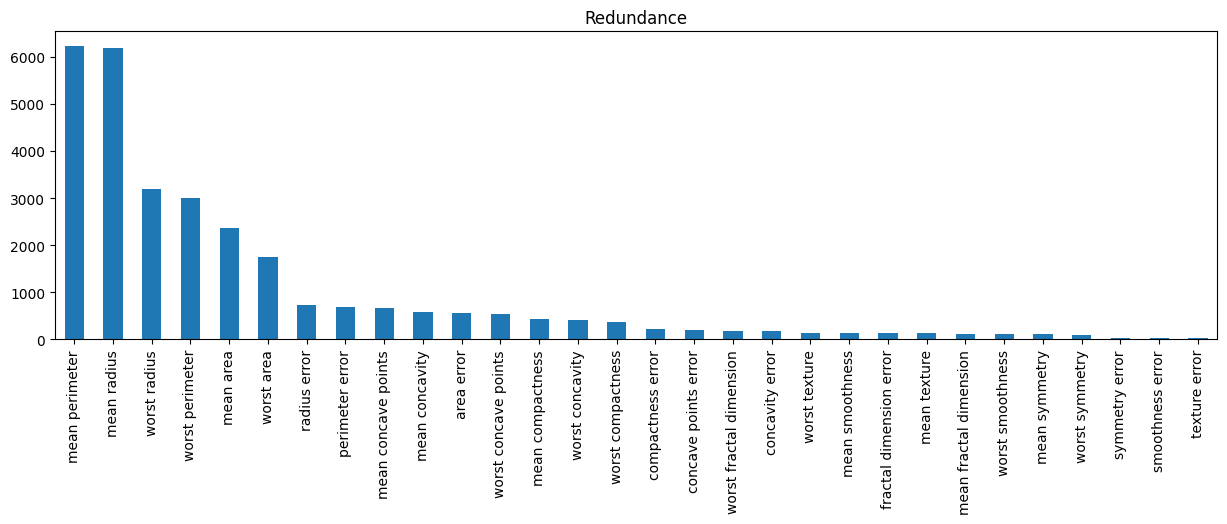

In [15]:
pd.Series(sel.redundance_, index=sel.variables_).sort_values(
    ascending=False).plot.bar(figsize=(15, 4))
plt.title("Redundance")
plt.show()

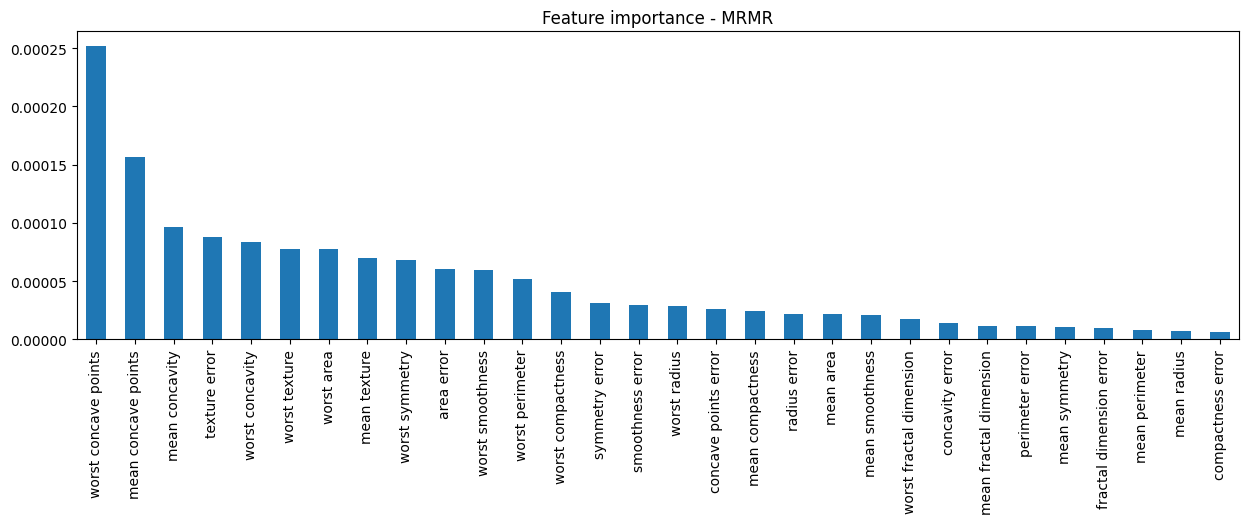

In [16]:
sel.mrmr_.sort_values(
    ascending=False).plot.bar(figsize=(15, 4))
plt.title("Feature importance - MRMR")
plt.show()

## mutual information

In [17]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X[['AveRooms', 'AveBedrms', 'AveOccup']] = X[['AveRooms', 'AveBedrms', 'AveOccup']].astype(int)

print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0         6          1       322.0         2     37.88   
1  8.3014      21.0         6          0      2401.0         2     37.86   
2  7.2574      52.0         8          1       496.0         2     37.85   
3  5.6431      52.0         5          1       558.0         2     37.85   
4  3.8462      52.0         6          1       565.0         2     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

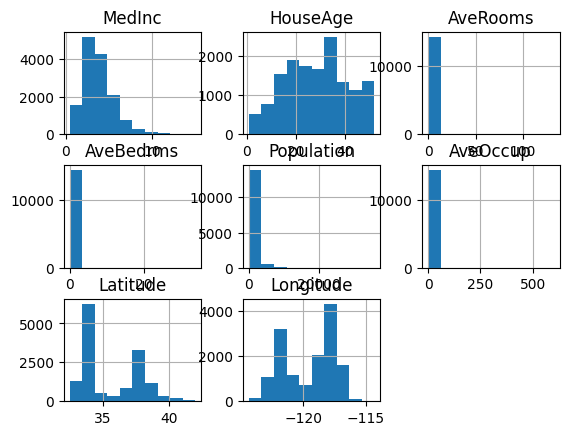

In [19]:
X_train.hist()
plt.show()

In [20]:
sel = MRMR(
    variables = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'],
    method="MIQ",
    discrete_features=[False, False, True, True, False, True],
    regression=True, 
    random_state=42,
)

sel.fit(X,y)

sel.mrmr_

MedInc        4.752725
HouseAge      0.894946
AveRooms      1.136606
AveBedrms     0.337142
Population    0.667695
AveOccup      1.986972
dtype: float64

In [21]:
Xtr = sel.transform(X)
print(Xtr.head())

   MedInc  AveOccup  Latitude  Longitude
0  8.3252         2     37.88    -122.23
1  8.3014         2     37.86    -122.22
2  7.2574         2     37.85    -122.24
3  5.6431         2     37.85    -122.25
4  3.8462         2     37.85    -122.25


In [22]:
sel.get_support()

[True, False, False, False, False, True, True, True]